# Oppgave 1

Vi utforsker her en modell for smittesprendning av sykdommer. Vi kan tenke oss at antall smittede indivier I (“Inceptibles”) utvikler seg slik:

It+1=It+aIt

Modellen sier noe om smitteutvikling i en populasjon der I er antall smittede og a er smittetallet. 

Modeller slik som denne kan brukes til å se på smittespredning eller andre tilfeller der vi ikke tar for oss mange begrensende faktorer. 

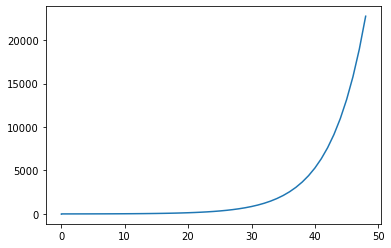

In [28]:
from pylab import *

a = 0.2 #smitterate per uke
t = 48 #tid i uker
p = 157759 #populasjon
I0 = 3
I = I0
tid = [0]
smittede = [I]

for i in range(t+1):
    if I < p:
        I = I + I*a
        tid.append(i)
        smittede.append(I)
    else:
        I = p
    
plot(tid,smittede)
show()

Vi ser at det er en eksponentiell utikling. Om vi øker a eller I0 vil antall smittede vokse mye raksere fordi det er lettere å bli smittet/flere smittebærere som kan spre det videre. 

Smitteraten må ha en enhet fordi om vi ønsker å se hvor mange som blir smitter hver uke, ikke hvor mange som er smittet totalt. 

# Oppgave 2

Vi utvider modellen ved å innføre en kategori for de som er mottakelige, S (“susceptibles”). Det vil si at de som allerede er smittet, ikke kan bli smittet igjen. Vi modifiserer da modellen for de smittede, slik at den også tar hensyn til den nye kategorien:

It+1=It+aItSt

I denne modellen legger vi altså mottakelige individer inn som en faktor. På denne måten sprer viruset seg gjennom den delen av befolkningen som ikke er smittet ennå. Vi kan gjøre dette fordi antall nye smittede blir påvirket av både hvor mange som er smittede, og hvor mange mottakelige de omgås (pluss smittetallet selvfølgelig).

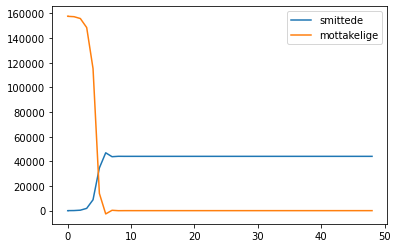

In [35]:
from pylab import *

p = 157759 #populasjon
a = 4/p #smitterate per uke
t = 48 #tid i uker
I02 = 3 #antall smittede ved t=0
I2 = I02 #antall smittede 
S02 = p-I02 #mottakelige ved t=0
S2 = S02 #mottakelige

tid2 = [0]
smittede2 = [I2]
mottakelige2 = [S2]


for i in range(t+1):
    if p > I2:
        I2 = I2 + a*I2*S2
        S2 = S2 - a*I2*S2
        tid2.append(i)
        smittede2.append(I2)
        mottakelige2.append(S2)
 
       
    
plot(tid2,smittede2,label="smittede")
plot(tid2, mottakelige2,label="mottakelige")
legend()
show() 

Om parameterne som a er for store kan grafene se veldig rare ut. Først hadde jeg a=0.2, som gjorde at S fort ble et veldig negativt tall. Med a som 4/p ser det mer riktig ut. 

En modell som dette kan være hensiktsmessig å bruke ettersom den også viser hvor mange som fortsatt er åpne for å bli smittet, og gir muligens en mer nøyaktig modell. Den sier derimot ingenting om at man kan bli frisk og smittet en gang til.

# Oppgave 3

Vi legger nå til muligheten for å bli frisk (hurra!). Da trenger vi også å innføre en bedringsrate, b. Et uttrykk for antall smittede kan nå være:

It+1=It+aItSt−bIt

Det første leddet er antall smittede fra før. Det andre er antall nye smittede basert på allerede smittede, smittetallet og antall mottakelige. Det siste leddet trekker fra den andelen av de allerede syke som har blitt friske.

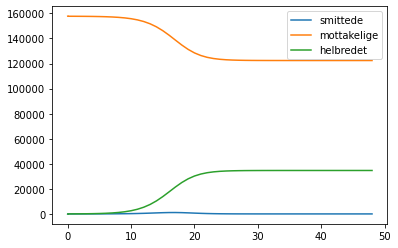

In [46]:
from pylab import *

p = 157759 #populasjon
a = 4/p #smitterate per uke
t = 48 #tid i uker
b=3.5 #helbredelsesrate per uke
I03 = 3 #antall smittede ved t=0
I3 = I03 #antall smittede 
S03 = p-I03 #mottakelige ved t=0
S3 = S03 #mottakelige
R = 0 #har blitt friske


tid3 = [0]
smittede3 = [I3]
mottakelige3 = [S3]
helbredet = [R]

for i in range(t+1):
    if p > I3:
        S3 = S3 - a*I3*S3
        I3 = I3 + a*I3*S3 - I3*b
        R = R + I3*b
        tid3.append(i)
        smittede3.append(I3)
        mottakelige3.append(S3)
        helbredet.append(R)
 
       
    
plot(tid3,smittede3,label="smittede")
plot(tid3, mottakelige3,label="mottakelige")
plot(tid3,helbredet,label="helbredet")
legend()
show() 

Her ser vi både smittede, firske og mottakelige i samme plot. Vi ser at antall infiserte aldri når et like høyt nivå som tidligere når folk blir friske, og at det i større grad flater seg ut og at ferre blir syke generelt. Antallet av som fremdeles er mottakelige ved slutten er mye høyere her enn i de tideligere eksemplene av grafene. 

Fordelen med denne grafen er at den gir et mer realisktisk bilde av utviklingen ettersom folk blir friske, og dermed ikke lenger kan spre sykdommen videre. Dette er grunnen til at sykdommen slutter å vokse fort og stopper opp. Om vi bruker et plot av bare infiserte over tid, ser vi at den når en topp litt etter 10 uker. Så faller antallet drastisk og holder seg stabilt på et lavt nivå. Samtidig stiger antallet som er helbredet av sykdommen mye. Vi kan da si at det fortsatt smittes nye folk, men at antallet nye smittede er lavere enn antallet av de allerede syke som blir helbredet. Altså er Ib større enn aIS. Da må b være større enn aS, og siden a er en konstant betyr dette at en stor del av befolkningen er blitt imune og ikke lenger kan bli smittet.  

En modell som dette vil selvfølgelig ikke være 100% fremdeles. Det er blant annet flere faktorer vi ikke tar med. For eksempel vil personer i et område bo med forksjellig tetthet også innenfor område, som kanskje vil føre til raskere lokal spredning og lokal gruppeimunitet innenfor et tettbebodd underområde. Ting som smitteverntiltak og deres effektivitet vil man heller ikke få et nøyaktig blikk på. Om a tar hensyn til smmitteverntiltak kan det tenkes at befolkningen ikke følger dem 100% og smitten burde vært større. Om a ikke tar hensyn til smitteverntiltak kan det tenkes at smitten burde vært lavere ettersom folk kanskje holder avstand osv. Vaksiner er ikke med, og det kan også være muligheter for å bli smittet flere ganger. 